In [29]:
from nltk import sent_tokenize, pos_tag
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from string import punctuation
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
def penn_to_wn(tag):
    """
        Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

In [3]:
def get_sentiment_score(text):
    
    """
        This method returns the sentiment score of a given text using SentiWordNet sentiment scores.
        input: text
        output: numeric (double) score, >0 means positive sentiment and <0 means negative sentiment.
    """    
    total_score = 0
    #print(text)
    raw_sentences = sent_tokenize(text)
    #print(raw_sentences)
    
    for sentence in raw_sentences:

        sent_score = 0     
        sentence = str(sentence)
        #print(sentence)
        sentence = sentence.replace("<br />"," ").translate(str.maketrans('','',punctuation)).lower()
        tokens = TreebankWordTokenizer().tokenize(text)
        tags = pos_tag(tokens)
        for word, tag in tags:
            wn_tag = penn_to_wn(tag)
            if not wn_tag:
                continue
            lemma = WordNetLemmatizer().lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sent_score += (swn_synset.pos_score() - swn_synset.neg_score())

        total_score = total_score + 1 if sent_score>0 else total_score - 1

    
    return total_score

In [4]:
reviews = pd.read_csv("../data/small_corpus.csv")

In [5]:
reviews.shape

(4500, 12)

In [6]:
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"11 30, 2015",A3AC92K59QLYR8,B00503E8S2,ben,Game freezes over and over its unplayable,it just doesn't work,1448841600,NaN,{'Format:': ' Video Game'},NaN
1,1.0,False,"05 19, 2012",A334LHR8DWARY8,B00178630A,Xenocide,"I have no problem with needing to be online to play and have had no problems with stability since the first 2 days. This review ignores those issues.\n\nThe game itself is fun and addictive, but so is Din's Curse (which was programmed by one guy) and is more re-playble than Diablo 3. Hopefully Torchlight 2 will take the mantle of this genere from Blizzard. One reason all these games are fun is because they are all similar in atmosphere, gameplay and loot system. As a stand alone title, D3 would be 4 stars, maybe- but as a successor to Diablo 2, with all the man-power and resources Blizzard had including the beautiful skill tree system from D2... If I could go lower than 1, I would.\n\nWhy was Diablo 2 addictive? One big reason was farming gear- loading magic find amd finding a group for Hell runs, kind of like a drug. But why? For the millions of regular players it was in order to gear up their next specialized build. Everything was centered around unique builds that become somewhat cookie cutter if good. Players perfectly balancing point distributions in attributes and skills to make that personalized zealot or blizzard sorc. The quest for constant gear for new builds was what drove the desire to aquire it. Every major nerf patch was like a ladder reset (which D3 lacks). Even if they add another 5 classes, the problem of no variation or ability to make a custom character means no constant demand for anything but a few top level items.\n\nThis seems intentional to keep server use lighter between expansions as there really is little reason to play unless your into farming for only a handful of desired endgame items. Everything else can be gotten off the AH for little gold. Unless they introduce raids that give special gear or something that would make that game into an MMO, none of the desire to keep playing is there unless it's more of a social hang-out.\n\nSo, where did all the money and time go? The skills are fun, as are the runes- but also very simplistic. The cut-screens are nicely done but, in this genere, most people watch them once or twice at most, they are basically useless. I'd hate to think all the resources went there when the cut-screens are movie quality where you see real looking people crying and giving decent lines, but then we shift back to real game-play and the next line from the smith who just killed his wife after she vomited and changed into an undead creature is a comically gruff and bemused... ""If you see my idiot apprentice out there, tell him to get back...""\n\nThe same companion dialogue reapeated over and over and often when fighting so it's annoying. It's all just randomized for the most part. So, your talking to your companions in a casual way about something trivial while getting killed by a boss. Poor execution of useless content. It happens often as well.\n\nIt is just sad to see no ability to customize a build, choose your dialogue or do much outside of what this game present to you. You essentially walking through how the developers envisioned you to progress- from what you say to what skills you want to master.\n\nIt's really sad to see how they dumbed this game down to the point where there is no ability to customize any aspect of your gameplay.",The only real way to show Blizzard our feelings is through Ultimate ratings,1337385600,23,{'Format:': ' Computer Game'},NaN
2,1.0,True,"10 19, 2014",A28982ODE7ZGVP,B001AWIP7M,Eric Frykberg,NOT GOOD,One Star,1413676800,NaN,{'Format:': ' Video Game'},NaN
3,1.0,True,"09 6, 2015",A19E85RLQCAMI1,B00NASF4MS,Joe,Really not worth the money to buy this game on PS4 unless it becomes $10.... don't make the mistake I made.,Real

In [7]:
reviews.dropna(subset=['reviewText'], inplace=True)

In [8]:
reviews.shape

(4499, 12)

In [9]:
reviews['swn_score'] = reviews['reviewText'].apply(lambda text : get_sentiment_score(text))

In [25]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
2146,"First, let me just say I love the Wii and love LOVE New Super Mario Brothers Wii. In fact, that game is the reason I bought a Wii. So my 3 star rating is not an indictment on the system or game, but rather the value of this bundle compared to the Mario Kart bundle. As a previous reviewer mentioned, this does not feature compatibility with Gamecube games and/or accessories. Obviously, that is a big negative. You'll be missing out on a vast library of games that include Mario Sunshine, Metroid Prime, and many other greats. Many of these games could be purchased rather cheap on here, eBay, or Gamestop.\n\nThen there's another ""feature"" they removed that I don't think was mentioned yet. And that is that this system is not meant to be set up in the vertical position. This Wii is designed a little differently and is a bit smaller, what with all the Gamecube ""guts"" taken out. It is not designed to be placed vertically, only down like the picture on the box indicates. Consequently, it does not come with a stand. Obviously, a lot of people enjoy the vertical positioning of their Wii, whether it be for aesthetic reasons or space saving necessity.\n\nAnd then, of course, you have the price. I think 149.99 is worth it for the Wii and this great game. Not, however, when there is much better value out there. Even at the MSRP of 149.99, the Mario Kart bundle is a better deal because of the Gamecube compatibility and vertical placement option. However, as some of you may be aware, Target and Walmart have permanently dropped the price of their Mario Kart bundles to $134. So you are paying 16 dollars less for a system that features Gamecube BC and a vertical stand and vertical placement option. It seems like a no brainer. In fact, when I heard that this bundle without these features was getting released, I figured it would be priced at about 100-120 dollars. I was surprised that this inferior bundle would be priced the same or in some cases like I mentioned, higher) as the superior Mario Kart bundles. The good news is that this bundle is not replacing the Mario Kart bundles. They will still be manufactured and available, this is just an alternative.\n\nSo in conclusion, I just don't think this is a good buy against the Mario Kart bundles. I love the Wii and the Mario game and urge everyone reading to buy one... just not this particular one. At least not until there is a price drop or you find a great deal that makes it worth not having the removed features. You can always buy the New Mario Bros game separately. And the advantage of doing that is that you get the game in a nice full sized red Wii case. With this bundle, you are getting it in a cheaper paper sleeve case, like Wii Sports in the past, which leaves the discs more prone to scratching and also lowers it's potential resell value, if you ever decide on selling it back for whatever reason. Hopefully this helps you make a better decision on which Wii Bundle to buy or not buy",31
2620,"Helps with hand cramping, feels more natural than holding the vita alone. I don't have the biggest hands but still uncomfortable to play for long periods. This grip solves that. 4 stars because it doesn't allow room for vita to be in a case, so I have to take case off to use grip",4


In [26]:
reviews[['reviewText','swn_score']].sample(2)

,reviewText,swn_score
3754,"Our family has both a wii and a kinect. We have a wii upstairs so we decided to get a kinect for downstairs for the entire family. The game is excellent and keeps the entire family, including myself, up on our feet and keeps the fun going all night. This game, along with dance central 2, are just absolutely fun games and the no controller aspect of kinect is really awesome and our children absolutely love it.",4
3297,This remote works very well. It is also very responsive to when you click the buttons. One of the cool features is that it lights up whenever you hold it in your hand! Great for night time watching when all the lights are out! Love it!,5


In [14]:
reviews['sentiment'] = reviews['swn_score'].apply(lambda x: "positive" if x>0 else "negative")

In [16]:
reviews['sentiment'].value_counts(dropna=False)

positive    2993
negative    1506
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

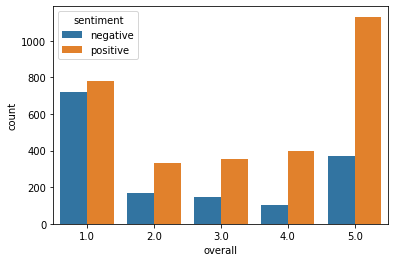

In [23]:
sns.countplot(x='overall', hue='sentiment' ,data = reviews)

<AxesSubplot:xlabel='sentiment', ylabel='overall'>

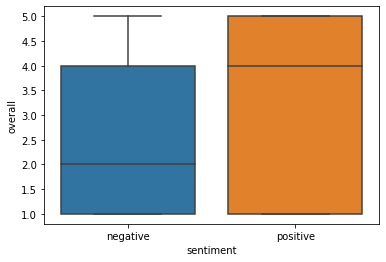

In [21]:
sns.boxplot(x='sentiment', y='overall', data = reviews)

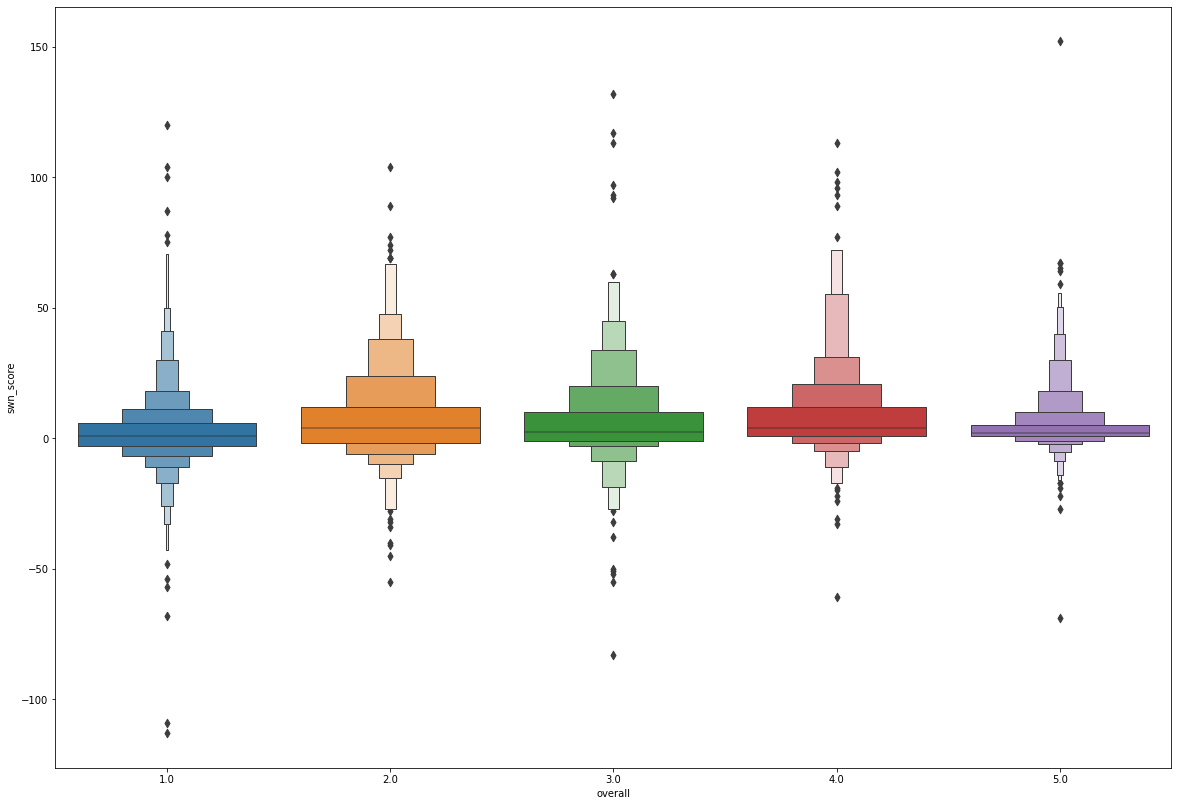

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (20,14))
sns.boxenplot(x='overall', y='swn_score', data = reviews, ax=ax)
plt.show()